# Calculating Survival Function for a Constant Event Rate

In [1]:
# importing libraries
import math
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Defining time from 0 to 100 with a step of 1

In [2]:
t = np.arange(0, 100, 1)

### Calculating survival probability values = exp(-lambda*t)

In [3]:
lamda = 0.05
exp = lambda x: math.exp(-lamda*x)
vect_exp = np.vectorize(exp)
survival = vect_exp(t)

### Plotting the survival curve for lambda = 0.05

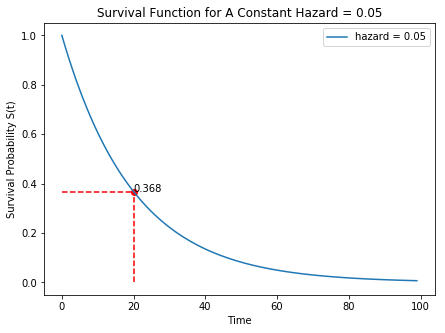

In [28]:
f, ax = plt.subplots(1, 1, figsize = (7, 5))
pl = sns.lineplot(x = t, y = survival, ax = ax, label = 'hazard = 0.05')
ax.hlines(y = survival[20], xmin = 0, xmax = 20, linestyles = '--', color = 'red')
ax.vlines(x = 20, ymin = 0, ymax = survival[20], linestyles = '--', color = 'red')
ax.scatter(x = 20, y = survival[20], c = 'red', marker = 'o')
ax.text(20, survival[20], str(round(survival[20], 3)))
pl.set_ylabel('Survival Probability S(t)')
pl.set_xlabel('Time')
pl.set_title('Survival Function for A Constant Hazard = 0.05')
plt.legend()
plt.show()

### Calculating expected lifetime = sum of survival probabilities

In [57]:
expected_T = np.sum(survival)
print('Expected value of T = {}'.format(expected_T))

Expected value of T = 2.7595962668607936


### Plotting the Survival Function, Cumulative Hazard Function and Expected Lifetime for different values of lambda

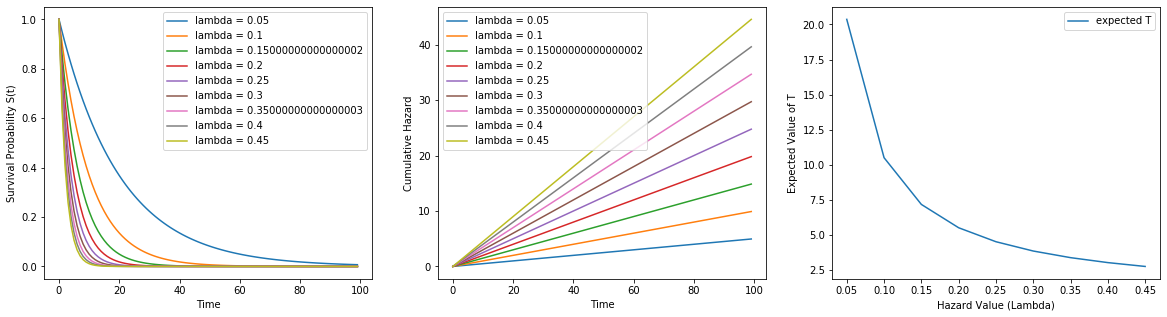

In [65]:
f, ax = plt.subplots(1, 3, figsize = (20, 5))
exp_T = []
lambdas = np.arange(0.05, 0.5, 0.05)
for lamda in lambdas:
    exp = lambda x: math.exp(-lamda*x)
    lin = lambda x: lamda*x
    vect_exp = np.vectorize(exp)
    vect_lin = np.vectorize(lin)
    survival = vect_exp(t)
    cum_hazard = vect_lin(t)
    exp_T.append(np.sum(survival))
    sur = sns.lineplot(x = t, y = survival, ax = ax[0], label = 'lambda = {}'.format(lamda))
    cum = sns.lineplot(x = t, y = cum_hazard, ax = ax[1], label = 'lambda = {}'.format(lamda))
sur.set_ylabel('Survival Probability S(t)')
sur.set_xlabel('Time')
cum.set_ylabel('Cumulative Hazard')
cum.set_xlabel('Time')
exp = sns.lineplot(x = lambdas, y = exp_T, ax = ax[2], label = 'expected T')
exp.set_ylabel('Expected Value of T')
exp.set_xlabel('Hazard Value (Lambda)')
plt.legend()
plt.show()